<h1>1.4Calibracion General descripcion

<b>Es imposible eliminar el ruido de la imagen sin procesar
   

                           raw image=bias +noise + dark current + fat x(sky + star)                            
                           
                           star+noise= (raw image - bias - dark current)/flat - sky

la dark current se calcula a partir de un dark frame

                            dark current + noise = (dark frame - bias)/dark exposure time

<h1>1.4.1

In [ ]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

from astropy.visualization import hist
from astropy.stats import histogram

import image_sim as imsim
from convenience_functions import show_image

In [2]:
# Use custom style for larger fonts and figures
plt.style.use('guide.mplstyle')

<h1>1.4.1.1

imagen con estrellas y mucho ruido

Text(0.5, 1.0, 'Stars with noise')

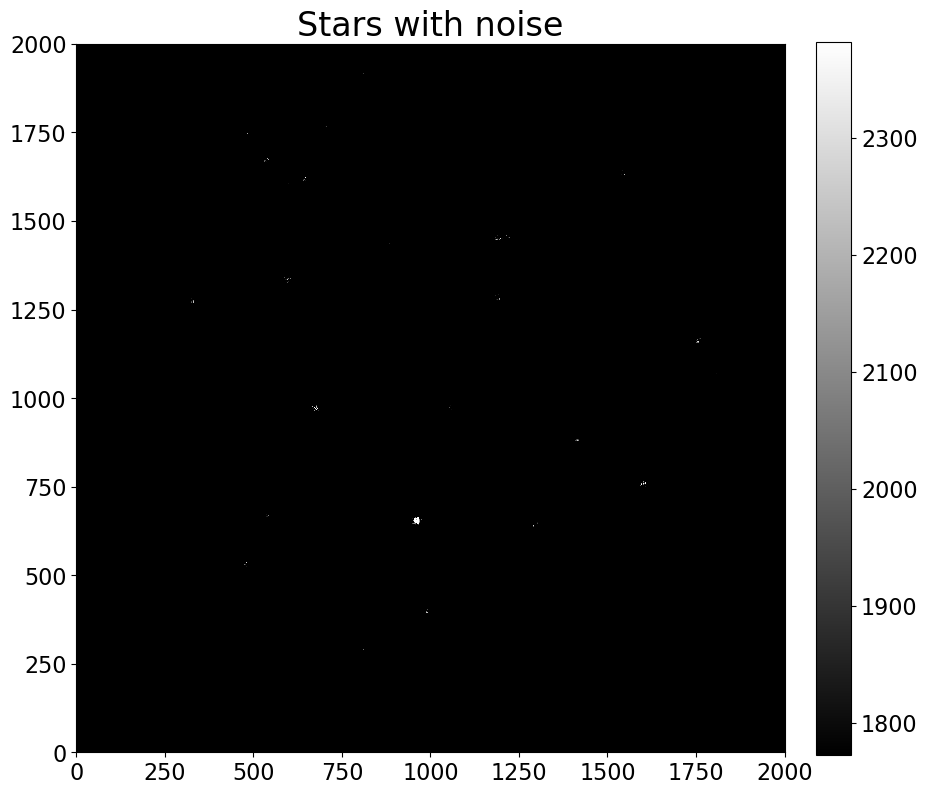

In [3]:
image = np.zeros([2000, 2000])
gain = 1.0
noise_amount = 1500 

stars_with_noise = imsim.stars(image, 50, max_counts=2000, fwhm=10) + imsim.read_noise(image, noise_amount, gain=gain)

show_image(stars_with_noise, cmap='gray', percu=99.9)
plt.title('Stars with noise')

<h1>1.4.1.2. intentar Eeducir el ruido

forma erronea de eliminar el ruido

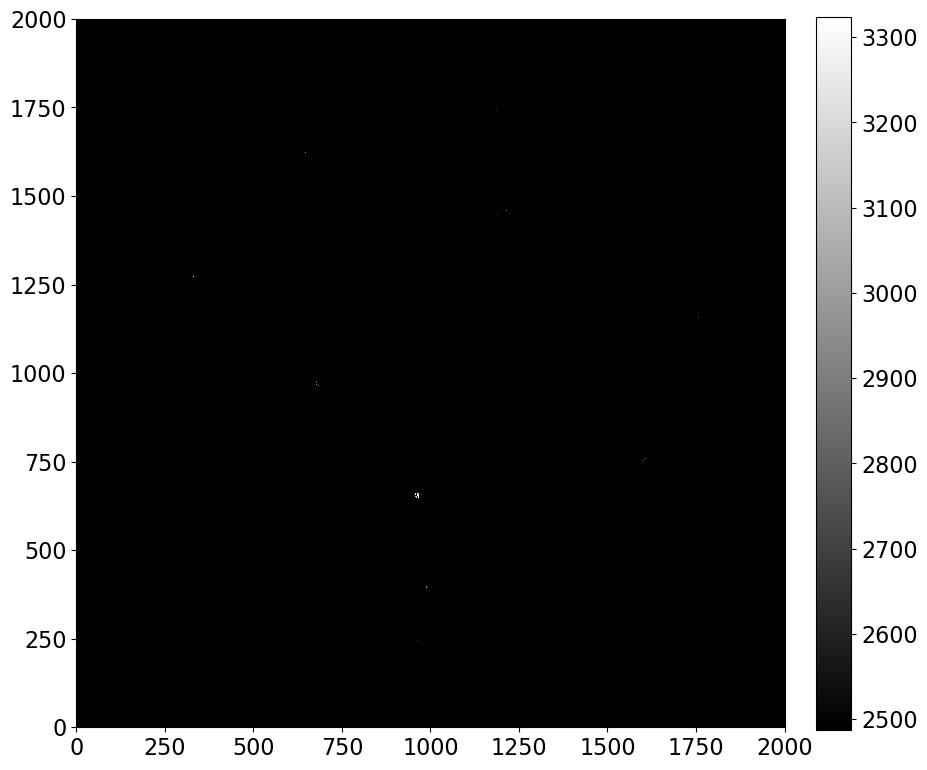

In [4]:
incorrect_attempt_to_remove_noise = stars_with_noise - imsim.read_noise(image, noise_amount, gain=gain)

show_image(incorrect_attempt_to_remove_noise, cmap='gray', percu=99.9)

<h1>1.4.2. imagen completa con ruido
   

no se puede quitar el ruido de una sola imagen o se generada mas ruido que en la imagena antes de quitar el ruido

<h1>1.4.2.1.Configurar parametros CCD

mas ruido que en el ejemplo anterior

In [5]:
gain = 1.0
star_exposure = 30.0
dark_exposure = 60.0
dark = 0.1
sky_counts = 20
bias_level = 1100
read_noise_electrons = 700
max_star_counts = 2000

<h1>1.4.2.2. Generar las imágenes, con ruido

In [8]:
bias_with_noise = (imsim.bias(image, bias_level, realistic=True) + 
                   imsim.read_noise(image, read_noise_electrons, gain=gain))

dark_frame_with_noise = (imsim.bias(image, bias_level, realistic=True) + 
                         imsim.dark_current(image, dark, dark_exposure, gain=gain, hot_pixels=True) +
                         imsim.read_noise(image, read_noise_electrons, gain=gain))

flat = imsim.sensitivity_variations(image)

In [9]:
realistic_stars = (imsim.stars(image, 50, max_counts=max_star_counts) +
                   imsim.dark_current(image, dark, star_exposure, gain=gain, hot_pixels=True) +
                   imsim.bias(image, bias_level, realistic=True) +
                   imsim.read_noise(image, read_noise_electrons, gain=gain)
                  )

<h1>1.4.2.3. Imagen sin calibrar

<Figure size 1200x1200 with 0 Axes>

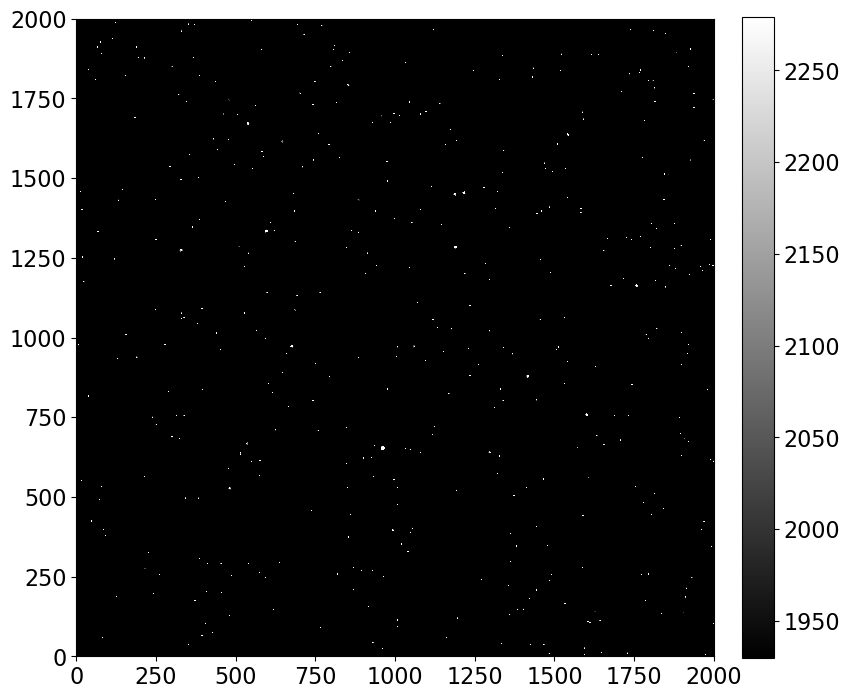

In [10]:
plt.figure(figsize=(12, 12))
show_image(realistic_stars, cmap='gray', percu=99.9, figsize=(9, 9))

se puede notar que es dificil distingir cuales son las estrellas

<h1>1.4.2.4 Calibrar la imagen

In [11]:
scaled_dark_current = star_exposure * (dark_frame_with_noise - bias_with_noise) / dark_exposure

In [12]:
calibrated_stars = (realistic_stars - bias_with_noise - scaled_dark_current) / flat

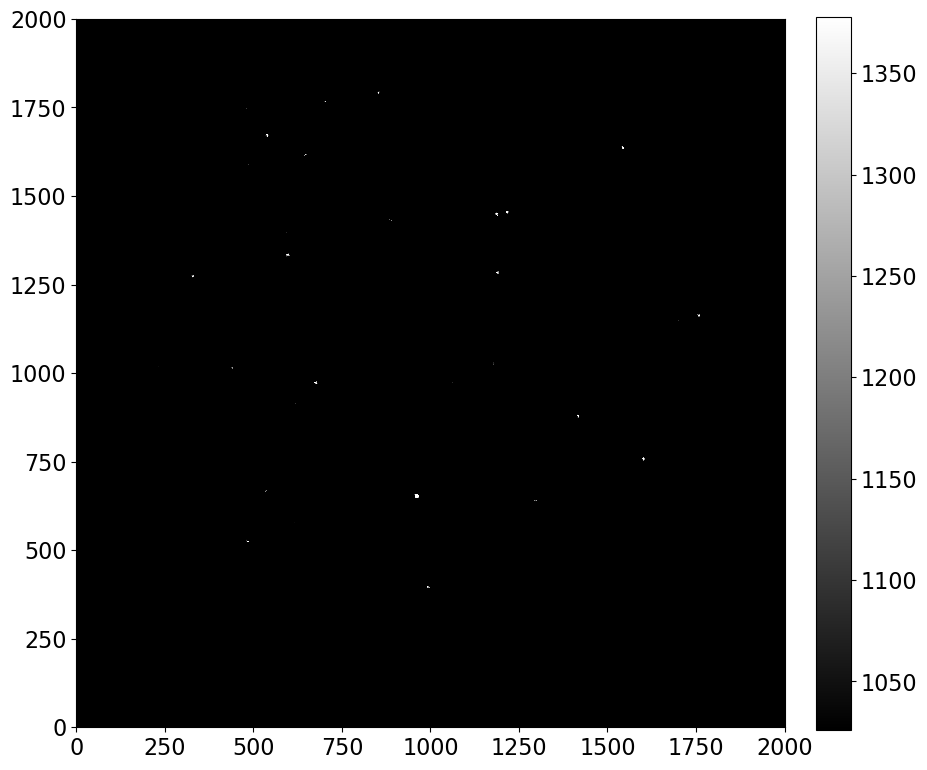

In [13]:
show_image(calibrated_stars, cmap='gray', percu=99.9)

las estrellas se diferencian mucho mas facilmente

<h1>1.4.2.6.reducir la imagen aumenta el ruido

histograma antes y despues de la calibracion

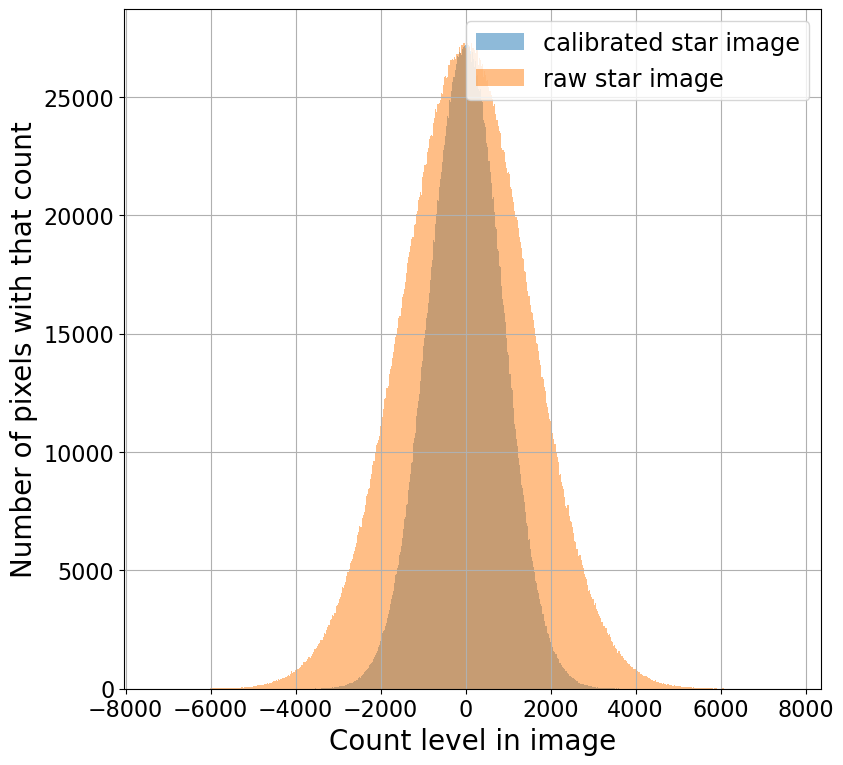

In [14]:
plt.figure(figsize=(9, 9))
hist(calibrated_stars.flatten(), bins='freedman', label='calibrated star image', alpha=0.5)
hist(stars_with_noise.flatten(), bins='freedman', label='raw star image', alpha=0.5)
plt.legend()
plt.grid()
plt.xlabel('Count level in image')
plt.ylabel('Number of pixels with that count');